In [1]:
import pandas as pd
import pprint as pp

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [4]:
from inc import stop_words as sw
from inc import extra_stopwords as esw
sw.STOP_WORDS = sw.STOP_WORDS.union(esw.common_stopwords)
sw.STOP_WORDS = sw.STOP_WORDS.union(esw.extra_stopwords)

In [5]:
from sqlalchemy import create_engine
table_name = 'Training_set'
db_path = 'db/training.sqlite'
db_path = 'sqlite:///' + db_path
engine = create_engine(db_path, echo=True)

In [6]:
df = pd.read_sql_table(table_name, engine)

2020-12-19 02:08:29,365 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-12-19 02:08:29,366 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 02:08:29,368 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-12-19 02:08:29,369 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 02:08:29,371 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-12-19 02:08:29,372 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 02:08:29,374 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='view' ORDER BY name
2020-12-19 02:08:29,374 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 02:08:29,376 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("Training_set")
2020-12-19 02:08:29,377 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 02:08:29,379 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNI

In [7]:
df = df.rename(columns={"class": "label"})

In [8]:
df = df.sample(frac=1).reset_index(drop=True) # randomize

In [9]:
train = df.sample(frac=0.8,random_state=200) #random state is a seed value
test = df.drop(train.index)

In [10]:
model = make_pipeline(TfidfVectorizer(stop_words=sw.STOP_WORDS), MultinomialNB())

In [11]:
model.fit(train.abstract, train.label)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words={'aderton', 'adertonde', 'adjö',
                                             'aldrig', 'allas', 'allt',
                                             'alltid', 'alltså', 'andra',
                                             'andras', 'annan', 'annat',
                                             'ansökan', 'arton', 'artonde',
                                             'att', 'av', 'avhandling',
                                             'bakgrund', 'bakom', 'bara',
                                             'behöva', 'behövas', 'behövde',
                                             'behövt', 'beslut', 'beslutat',
                                             'beslutit', 'bland', 'blev', ...})),
                ('multinomialnb', MultinomialNB())])

In [12]:
labels = model.predict(test.abstract)

In [13]:
pp.pprint(labels)

array([ 7, 17,  9, 15, 11,  4, 12, 12,  9, 17, 12,  4, 15, 11,  9,  4,  3,
        7, 10,  8, 17, 17, 17, 17,  3,  2,  2,  9,  2, 10, 14, 17, 13,  6,
       17, 12,  3, 10, 17, 11, 10,  9, 15,  4, 17,  9, 17, 12, 15,  2, 14,
        3,  7, 17, 17,  3,  8, 15, 10, 14, 14, 15, 17, 12, 17, 17,  6,  3,
       17, 12, 13,  2, 15, 11,  9, 17, 11, 15, 12, 11, 14, 14, 17, 17, 17,
       10,  9, 10, 13,  4,  9, 17, 17,  8, 17, 10,  3,  9,  7, 10, 17, 17,
       17, 14, 17,  3,  2,  9,  3,  2, 11, 17, 15,  3,  2,  9, 17, 17, 17,
       16,  6, 10,  2, 10,  3, 17,  4, 15,  3,  2,  2, 13, 17, 10, 10, 12,
       10,  3, 11, 15, 16, 17,  8,  3,  9, 14,  9, 17, 13,  8, 11, 17, 12,
       14,  9, 17,  3, 12, 17, 11, 17, 10, 10,  2,  7,  6,  2, 10, 14, 17,
       15, 10,  7,  4,  9,  3, 14, 11, 11, 14,  9,  2,  9, 17, 17,  9, 16,
        7, 14,  2, 17, 11,  8, 14,  9, 17,  4, 11,  3, 17,  8,  4,  3, 17,
       17, 17, 15,  4, 17,  9, 11, 17,  3,  4, 17, 15, 14, 15, 15,  9, 15,
        2, 14,  4, 14,  9

In [14]:
test = test.drop(columns=['index'])

In [15]:
test = test.reset_index(drop=True)

In [16]:
test

,abstract,label
0,projekt vara att ta fram kunskap om hur byggna...,7
1,med vara att möjliggöra distansundervisning ...,4
2,biocell analytica leverera analys som ge kun...,6
3,inom en snar framtid förvänta en global uppvär...,15
4,många flerfamiljshus komma att renovera en när...,11
...,...,...
302,gran vara central för svensk bioekonomi som kä...,15
303,under initieringsfas ha vara att skapa förut...,16
304,den finnas en växa medvetenhet om en många tjä...,11
305,beständighet hos betong som en av en mycket an...,12


In [17]:
confusion_mx = {}
for ix, label in enumerate(labels):
    if label == test.label[ix]:
        if label in confusion_mx:
            confusion_mx[label] += 1
        else:
            confusion_mx[label] = 1

In [18]:
conf_labels = list(range(2,18))

In [19]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.label, labels, labels=conf_labels)

In [20]:
pp.pprint(mat)

array([[17,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1, 13,  0,  0,  0,  0,  0,  1,  2,  0,  0,  0,  0,  0,  1,  2],
       [ 0,  0,  7,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  4],
       [ 1,  2,  0,  0,  5,  1,  0,  1,  0,  1,  0,  0,  3,  1,  2,  2],
       [ 2,  1,  0,  0,  0,  5,  1,  4,  1,  0,  0,  0,  1,  1,  1,  4],
       [ 0,  0,  2,  0,  0,  0,  2,  6,  4,  0,  1,  0,  0,  0,  0,  8],
       [ 0,  0,  2,  0,  0,  1,  1,  4,  0,  0,  0,  0,  0,  0,  0,  6],
       [ 0,  1,  2,  0,  0,  0,  2,  3,  6,  1,  1,  0,  0,  0,  1,  4],
       [ 0,  1,  0,  0,  0,  0,  1,  3,  1,  9,  0,  0,  0,  0,  0,  5],
       [ 1,  2,  0,  0,  0,  0,  0,  4,  0,  3, 13,  0,  2,  0,  0,  1],
       [ 0,  0,  2,  0,  0,  0,  0,  3,  1,  4,  0,  5,  1,  2,  1,  8],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0, 11,  0,  0,  1],
       [ 0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,

In [21]:
sorted_dict = dict(sorted(confusion_mx.items()))

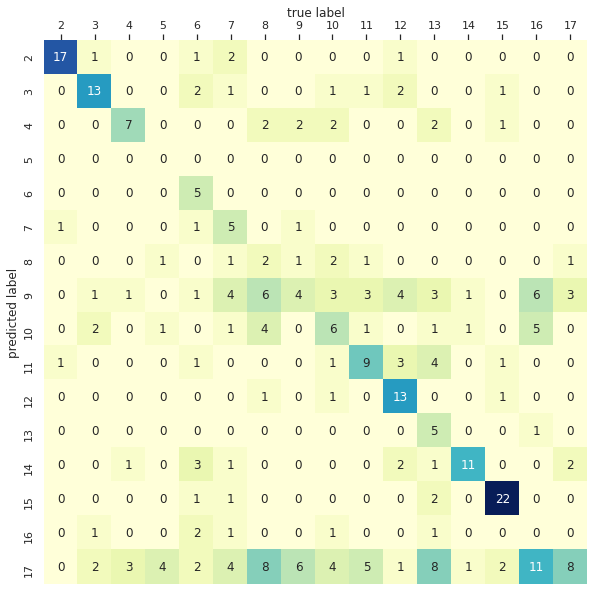

In [22]:
sns.set(style="white", color_codes=True)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=conf_labels, yticklabels=conf_labels,cmap="YlGnBu")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

plt.xlabel('true label')
plt.ylabel('predicted label');

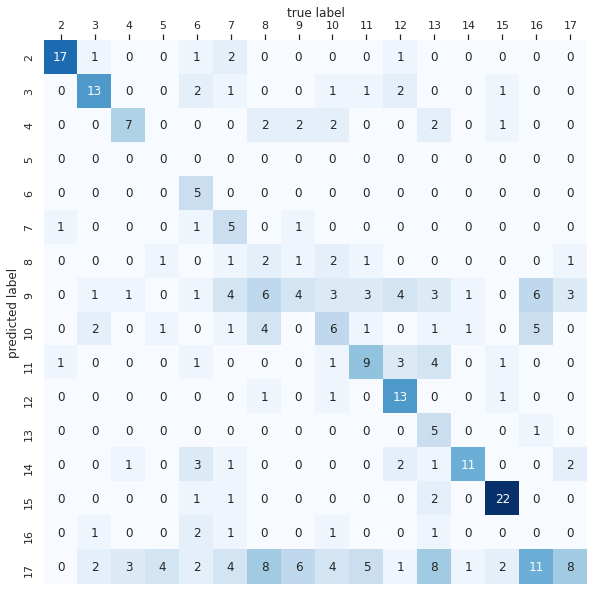

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=conf_labels, yticklabels=conf_labels,cmap="Blues")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

plt.xlabel('true label')
plt.ylabel('predicted label');

In [31]:
fig.savefig('img/heat_map_MultinomialNB.png')

In [25]:
from sklearn.metrics import classification_report

In [26]:
report = classification_report(test.label, labels, zero_division=0)
print(report)

              precision    recall  f1-score   support

           2       0.77      0.89      0.83        19
           3       0.62      0.65      0.63        20
           4       0.44      0.58      0.50        12
           5       0.00      0.00      0.00         6
           6       1.00      0.26      0.42        19
           7       0.62      0.24      0.34        21
           8       0.22      0.09      0.12        23
           9       0.10      0.29      0.15        14
          10       0.27      0.29      0.28        21
          11       0.45      0.45      0.45        20
          12       0.81      0.50      0.62        26
          13       0.83      0.19      0.30        27
          14       0.52      0.79      0.63        14
          15       0.85      0.79      0.81        28
          16       0.00      0.00      0.00        23
          17       0.12      0.57      0.19        14

    accuracy                           0.41       307
   macro avg       0.48   

In [27]:
report_dict = classification_report(test.label, labels, zero_division=0, output_dict=True)

In [28]:
report_df = pd.DataFrame.from_records(report_dict)

In [29]:
report_T = report_df.T.sort_index(na_position={'2', '17'})

In [30]:
report_T.to_csv (r'db/report_MultinomialNB.csv', index = True, header=True)